In [6]:
import argparse
import os
import numpy as np
import math
import itertools
import time
import datetime
import sys

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

from models import *
from datasets import *

import torch.nn as nn
import torch.nn.functional as F
import torch

In [7]:
genpath = 'saved_models/facades/generator_60.pth'
dispath = 'saved_models/facades/discriminator_60.pth'

generator = GeneratorUNet()
generator.load_state_dict(torch.load(genpath))

<All keys matched successfully>

In [8]:
dataloader = DataLoader(
    ImageDataset(),
    batch_size=1,
    shuffle=True,
    num_workers=1,
)

/home/matthewachan/datasets/FSS-1000/fewshot_data/tiger/1
(224, 224, 4)


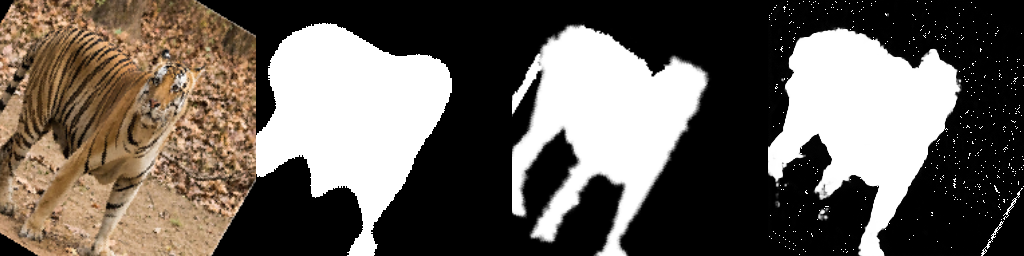

In [49]:
imgs = next(iter(dataloader))
gtmask = Variable(imgs["gtmask"].type(torch.Tensor))
imgin = Variable(imgs["imgin"].type(torch.Tensor))
genmask = generator(imgin)
path = imgs["path"]
img_sample = torch.cat((imgin.data[:,0:3,:,:], 
                        imgin.data[:,3:4,:,:].repeat(1,3,1,1)*255, 
                        gtmask.data.repeat(1,3,1,1), 
                        genmask.data.repeat(1,3,1,1)*255,),
                       dim=3)
img_sample = np.array(img_sample[0,:,:,:].permute(1,2,0))
print(path[0])
problem = Image.open(path[0] + '.png')
print(np.array(problem).shape)

Image.fromarray(img_sample.astype('uint8'))